**PROJECT: Build a model that predicts the house values.** 


**BUSINESS UNDERSTANDING:Real estate markets are influenced by numerous factors, such as location, property size, number of bedrooms, amenities, and economic conditions to name a few.The importance of Deploying Machine learning in predicting the house prices lies in it's ability to harness the power of data, adapt to complex scenarios, and provide accurate and actionable predictions that can aid buyers, sellers, and real estate professionals in making informed decisions.**

**Goal: Build a model that can predict the Housing Prices of California using features such as longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households amongst other aspects.**

This dataset can also be found on https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv


    

**Importing of relevant libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor 


In [2]:
ch_data=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv") 

**EXPLORATORY DATA ANALYSIS**

In [3]:
ch_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
ch_data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [5]:
ch_data.shape

(20640, 10)

In [6]:
ch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
ch_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
print("Missing Value by Column") 
print("-" *35)
print(ch_data.isna().sum())
print("-"*35)
print("THE TOTAL MISSING VALUES BY COLUMN:",ch_data.isna().sum().sum())
      
      

Missing Value by Column
-----------------------------------
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
-----------------------------------
THE TOTAL MISSING VALUES BY COLUMN: 207


**Lets have a look at the categorical data**

In [9]:
ch_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
ch_data=pd.get_dummies(ch_data, columns =["ocean_proximity"],drop_first=True) 

In [11]:
print(ch_data) 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [12]:
ch_data=ch_data.dropna()

In [13]:
ch_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20433 rows x 13 columns]

**DATA VISUALISATION**

**Here we use histograms to represent the frequency distribution of a few data points of the variables**

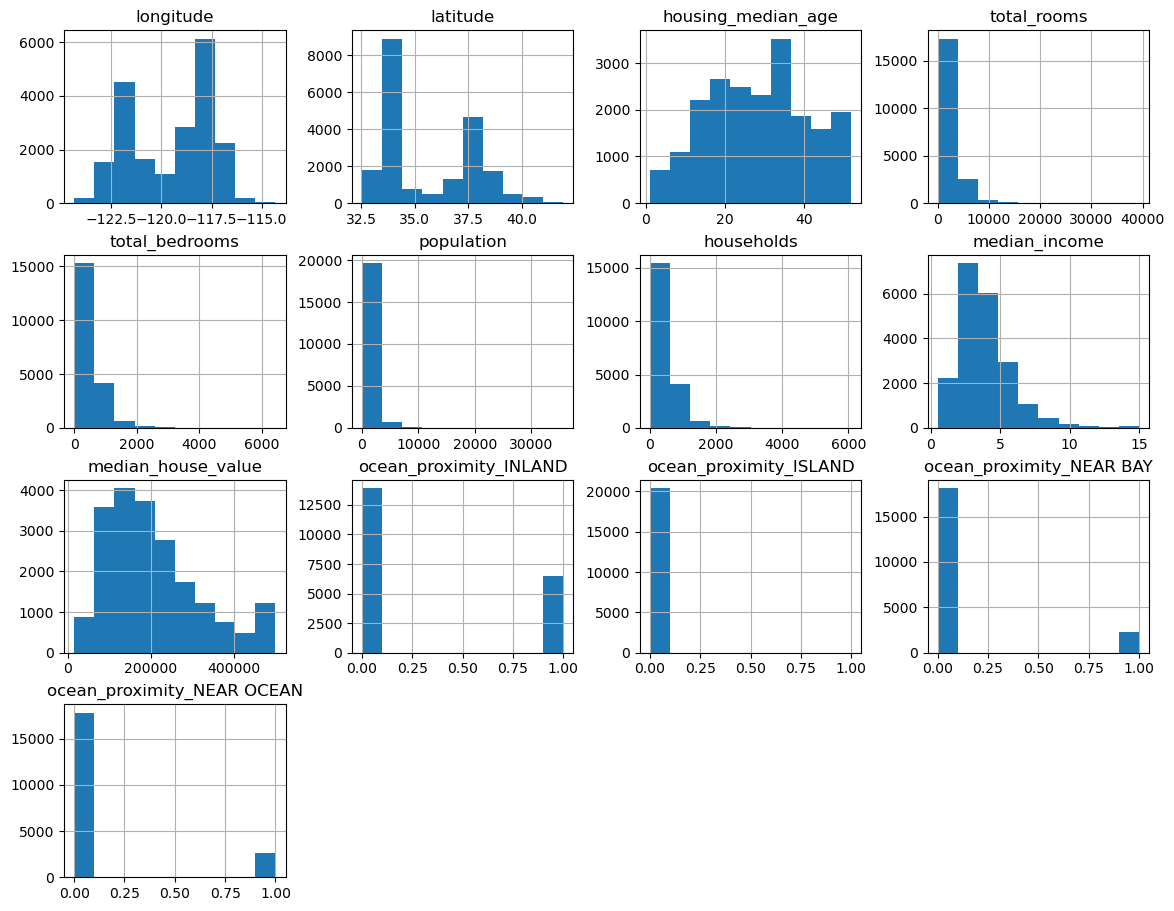

In [14]:
ch_data.hist(figsize=(14,11))
plt.show()

**JOINT PLOTTING 
Here we use joint plot as a way of understanding the relationship our target variable( median income) and the features and their distribution as pairs.**

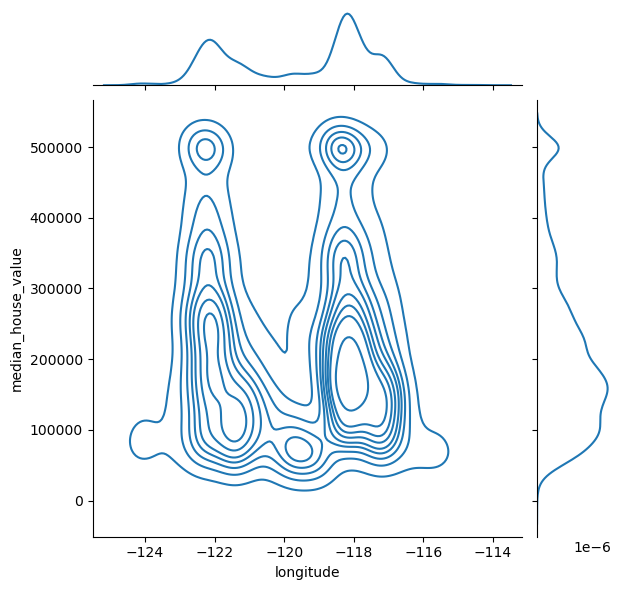

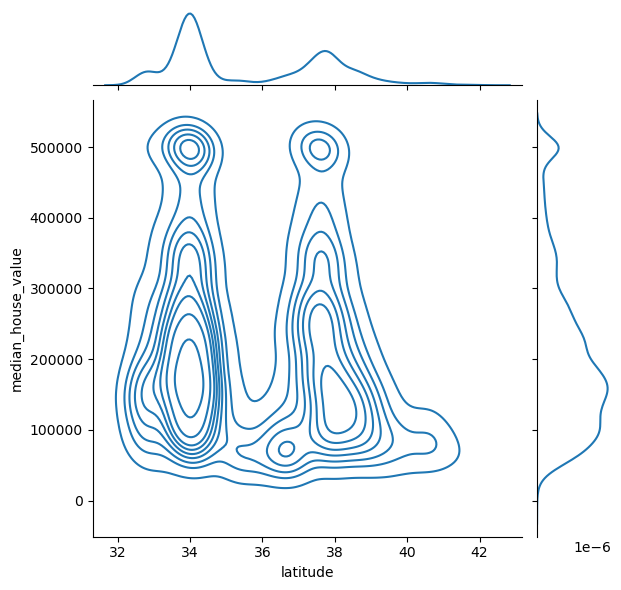

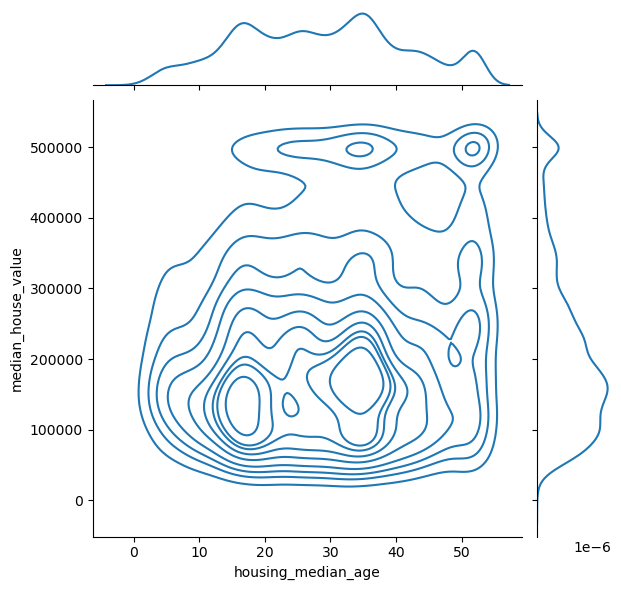

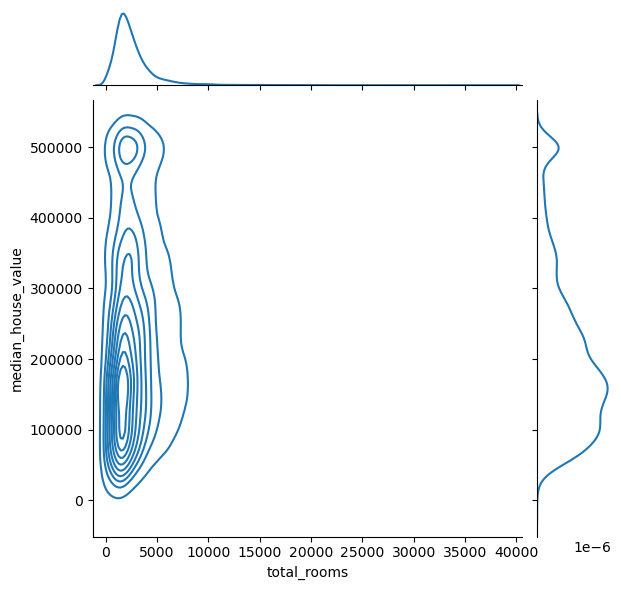

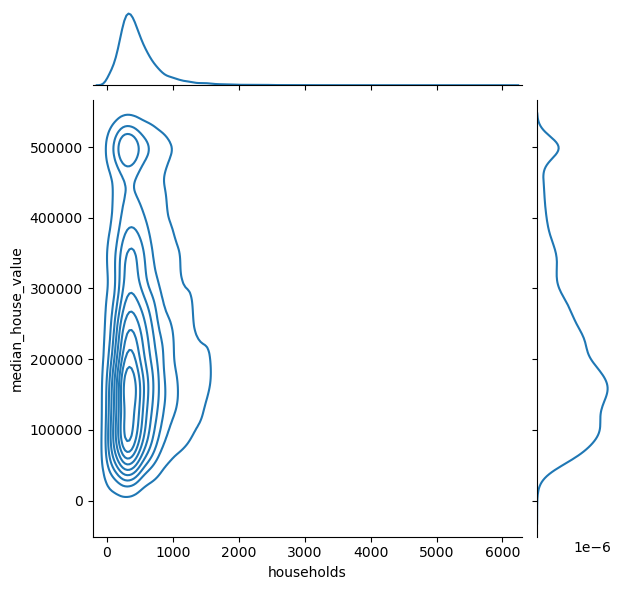

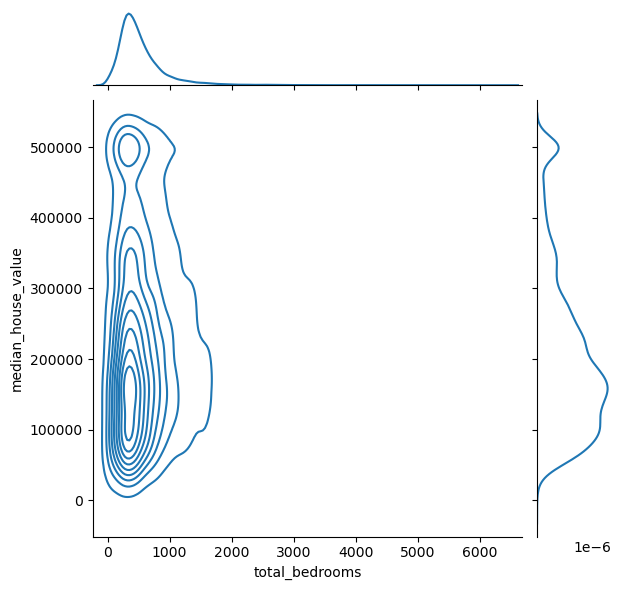

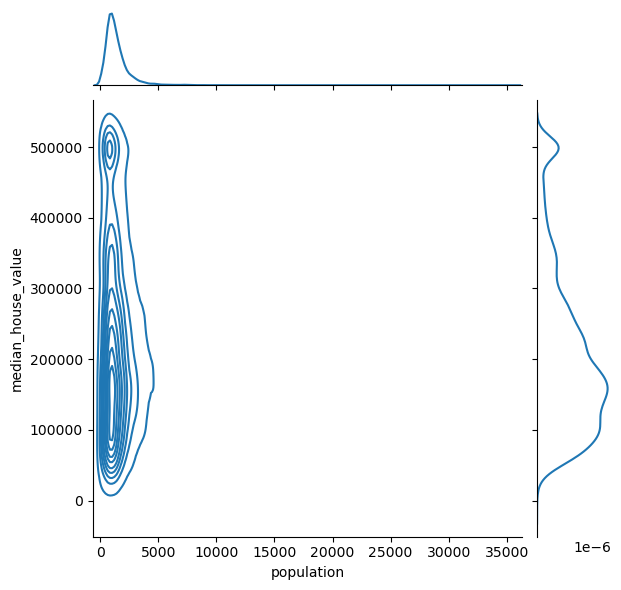

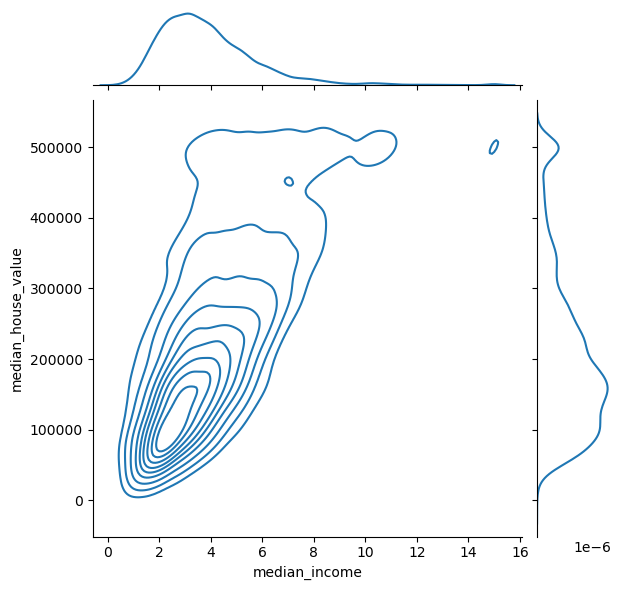

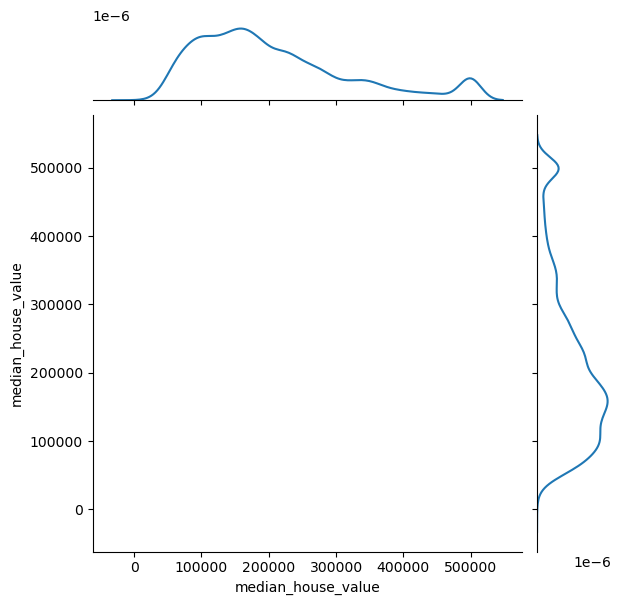

In [15]:
num_cols=["longitude","latitude","housing_median_age" ,"total_rooms","households", "total_bedrooms","population","median_income","median_house_value"] 
for cols in num_cols:
    sns.jointplot(x=cols,y="median_house_value" , data=ch_data, kind="kde") 

<function matplotlib.pyplot.show(close=None, block=None)>

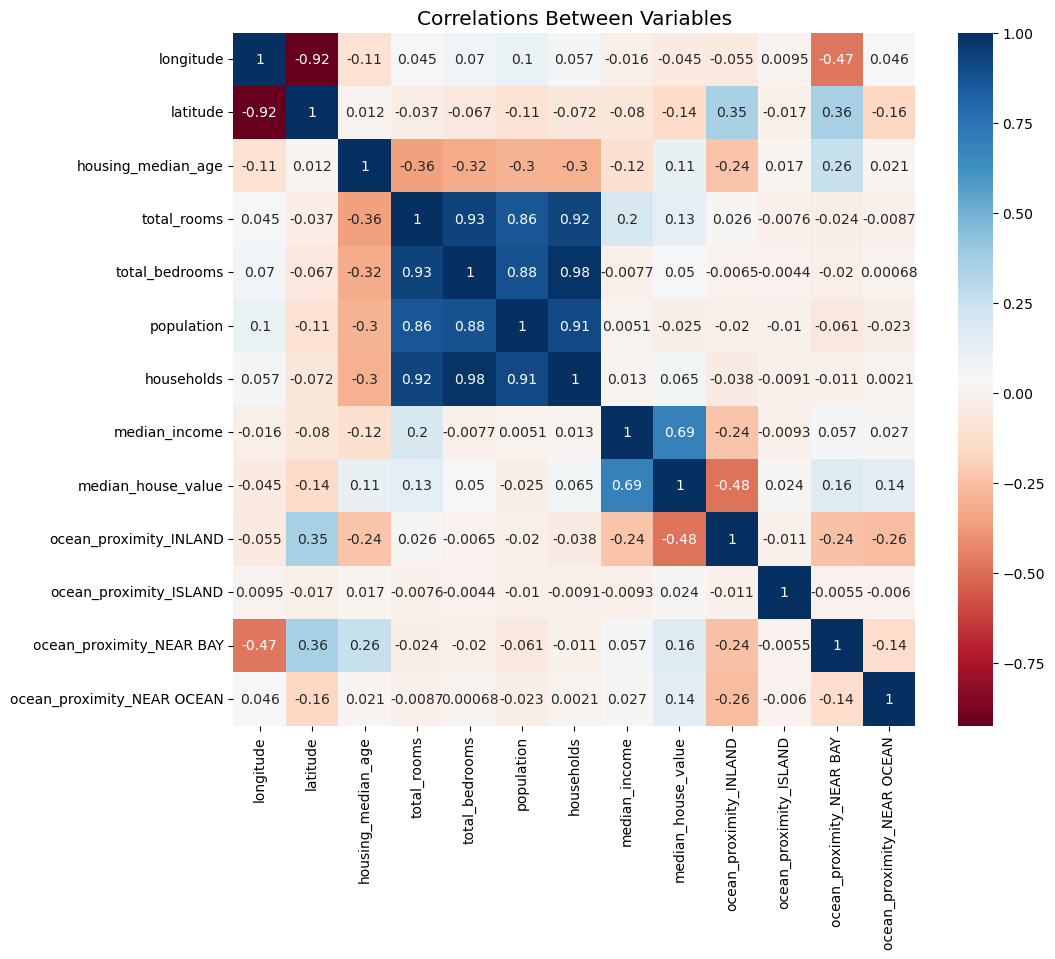

In [16]:
plt.figure(figsize=(11,9))
sns.heatmap(ch_data.corr(),cmap="RdBu",annot=True) 
plt.title("Correlations Between Variables", size=14.5)
plt.show

In [17]:
ch_data.corr()["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688355
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

**It is evident that there is a  strong positive correlation between median_house_price and median_income**

**VARIABLES PAIRPLOTTING**

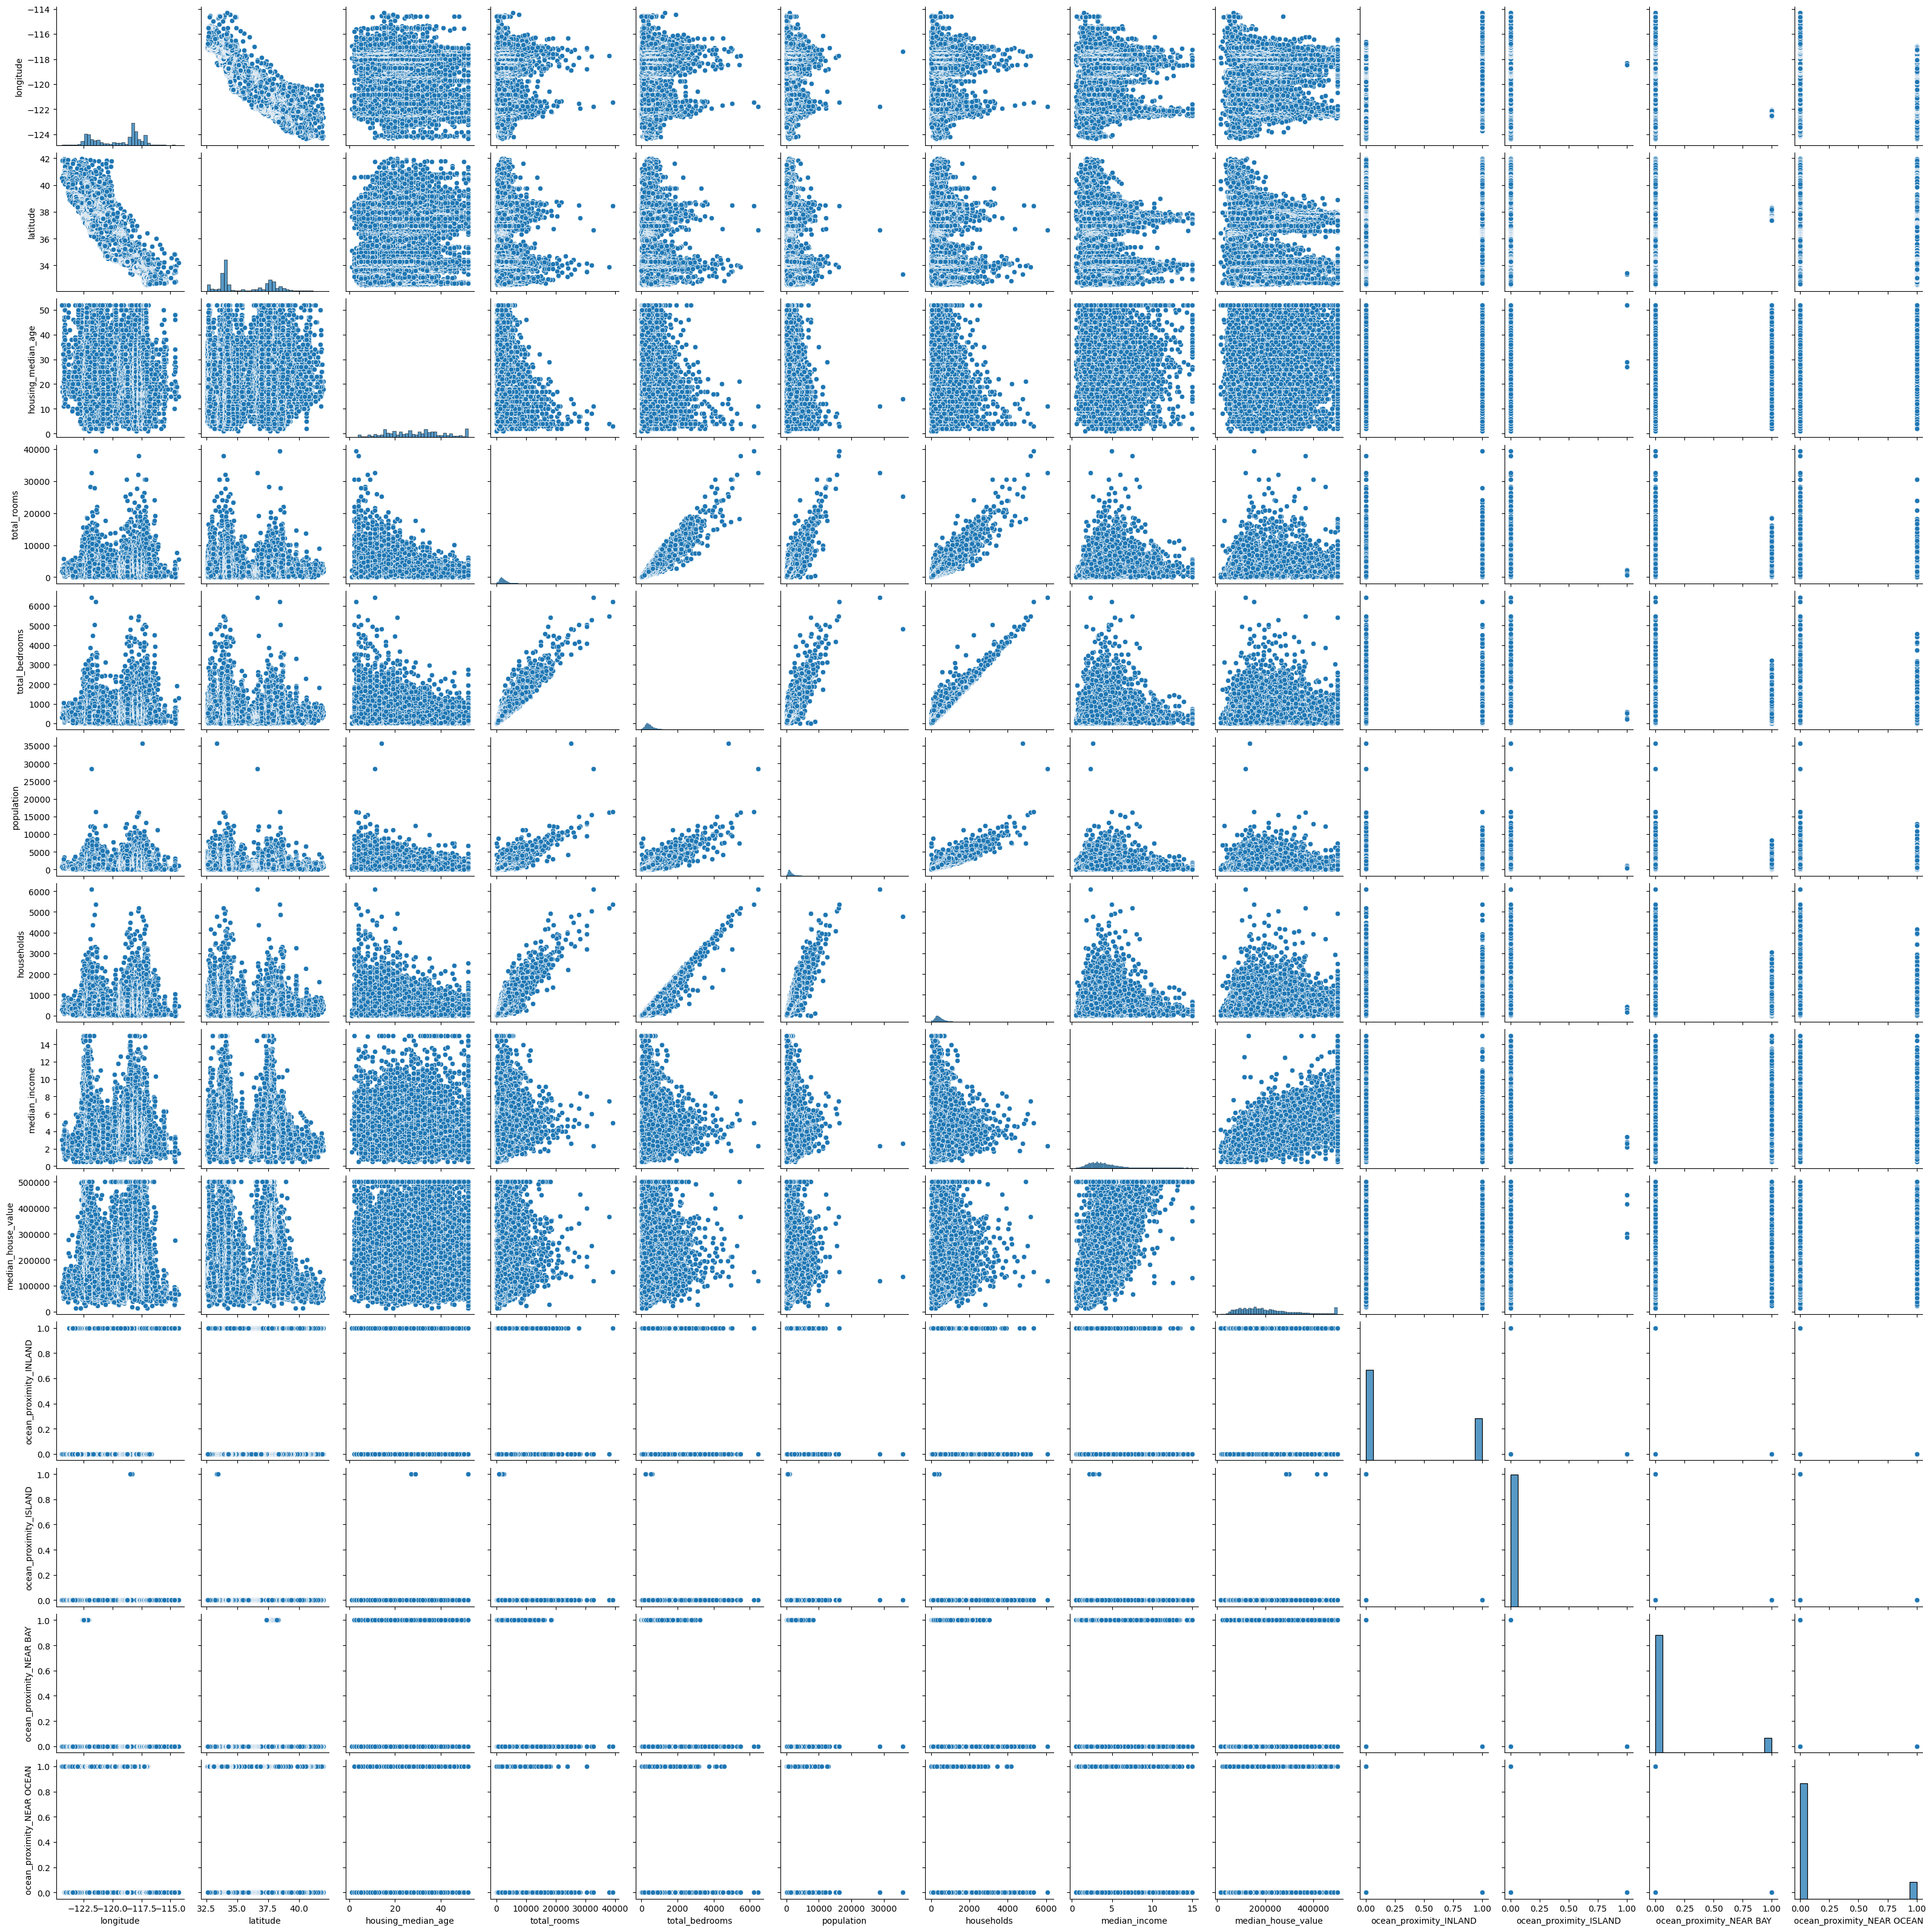

In [18]:
sns.pairplot(ch_data)

> 

**FINAL DATA PREPROCESSING AND PREPARATION BEFORE MODELLING**

**Extraction and setting of our target variable**

In [19]:


X=ch_data.drop('median_house_value', axis=1)
y=ch_data['median_house_value'] 

In [20]:
ch_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20433 rows x 13 columns]

**Train and test data split for better evaluation**

In [21]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.23,random_state=42)

In [22]:
Lin_reg=LinearRegression() 
Lin_reg.fit(X_train,y_train)
L_preds =Lin_reg.predict(X_test)


print("mean_squared error : ", mean_squared_error(y_test,L_preds))
L_accuracy=Lin_reg.score(X_test , y_test)*100

print("test data accuracy: "+ str(round(L_accuracy,2)) + "%")

score = cross_val_score(Lin_reg, X, y, cv=5)

mean_score = str(round(np.mean(score) * 100, 2)) +"%"


print("CV Score:",mean_score)

                   

mean_squared error :  4691323972.539689
test data accuracy: 65.58%
CV Score: 56.21%


In [23]:
rfg=RandomForestRegressor () 
rfg.fit(X_train,y_train) 
r_preds=rfg.predict(X_test) 

print("mean_squared error : ", mean_squared_error(y_test,r_preds))
r_accuracy=rfg.score(X_test , y_test)*100

print("test data accuracy: "+ str(round(L_accuracy,2)) + "%")

score = cross_val_score(rfg, X, y, cv=5)

mean_score = str(round(np.mean(score) * 100, 2)) +"%"


print("CV Score:",mean_score)



mean_squared error :  2361334524.8871045
test data accuracy: 65.58%
CV Score: 50.2%


In [26]:
lasso=Lasso()
lasso.fit(X_train,y_train)
la_preds=lasso.predict(X_test)

print("mean_squared error : ", mean_squared_error(y_test,la_preds))
la_accuracy=lasso.score(X_test , y_test)*100

print("test data accuracy: "+ str(round(la_accuracy,2)) + "%")

score = cross_val_score(lasso, X, y, cv=5)

mean_score = str(round(np.mean(score) * 100, 2)) +"%"


print("CV Score:",mean_score)








mean_squared error :  4690650843.224594
test data accuracy: 65.58%
CV Score: 56.21%


In [ ]:
xgb_reg=XGBRegressor() 
xgb_reg.fit(X_train,y_train) 
x_preds=xgb_reg.predict(X_test)

print("mean_squared error : ", mean_squared_error(y_test,x_preds))
x_accuracy=xgb_reg.score(X_test , y_test)*100

print("test data accuracy: "+ str(round(x_accuracy,2)) + "%")

score = cross_val_score(xgb_reg, X, y, cv=5)

mean_score = str(round(np.mean(score) * 100, 2)) +"%"

print("CV Score:",mean_score)


**From the above the best perfoming model is the XGBRegressor with the lowest mean_squared_error of 2274935911 and with a test data accuracy  of 83%.It also has the highest Cross Validation score of 60%.**

**The other models had the cross validation accuracy score as follows:**
**LinearRegression:56%**
**RandomForestRegressor:51%**
**Lasso: 56%**


**Conclusively the model best suitable to be deployed for predicting the housing prices of California is the XBGRegressor**